<a href="https://colab.research.google.com/github/OnurKerimoglu/Colab_Notebooks/blob/master/Pytorch_Learning_non_linearities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notice how increasing the number of layers increases the capacity of the classifier.  Source: https://cs231n.github.io/neural-networks-case-study/

* Try experimenting with weight decay regularization and different learning rates. You will find the formulas below. 

 



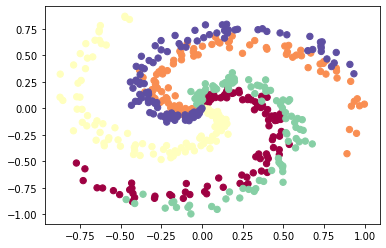

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [2]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [3]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In [4]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

#probs

In [6]:
correct_logprobs = -np.log(probs[range(num_examples),y])
correct_logprobs

array([1.60943791, 1.60950177, 1.60961223, 1.60964981, 1.6096535 ,
       1.60984007, 1.60982794, 1.61006277, 1.60994437, 1.61015462,
       1.61031081, 1.61036409, 1.61024118, 1.61061849, 1.61037649,
       1.61086127, 1.61073746, 1.61105229, 1.61116767, 1.61122872,
       1.61132449, 1.61141257, 1.61147913, 1.61163865, 1.61173597,
       1.61170157, 1.6118675 , 1.61203411, 1.61212011, 1.61213016,
       1.61226451, 1.61229379, 1.61198991, 1.61240249, 1.61234225,
       1.61237495, 1.61242852, 1.61260472, 1.6129802 , 1.61235182,
       1.61265978, 1.61321261, 1.61221999, 1.61255335, 1.61196761,
       1.61274038, 1.61251827, 1.61262882, 1.61309876, 1.61284542,
       1.61320434, 1.61167228, 1.61149201, 1.61232622, 1.61201426,
       1.61014746, 1.60986978, 1.61118166, 1.61053495, 1.610009  ,
       1.61046766, 1.611367  , 1.61040945, 1.6121155 , 1.61114508,
       1.61008866, 1.6070395 , 1.60832926, 1.60900089, 1.60949191,
       1.60848127, 1.60517511, 1.60971596, 1.60609524, 1.60785

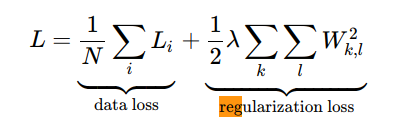

In [8]:
# compute the loss: average cross-entropy loss and regularization
reg = 0.5 ## reg represents the lambda parameter in the equation above 
           ### this lambda is also called the 'weight decay' coefficient for l2 regularization
           ### CHOOSE A VALUE BETWEEN 0 AND 1

data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [9]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


In [10]:
correct_logprobs = -np.log(probs[range(num_examples),y])
correct_logprobs

array([1.60943791, 1.60950177, 1.60961223, 1.60964981, 1.6096535 ,
       1.60984007, 1.60982794, 1.61006277, 1.60994437, 1.61015462,
       1.61031081, 1.61036409, 1.61024118, 1.61061849, 1.61037649,
       1.61086127, 1.61073746, 1.61105229, 1.61116767, 1.61122872,
       1.61132449, 1.61141257, 1.61147913, 1.61163865, 1.61173597,
       1.61170157, 1.6118675 , 1.61203411, 1.61212011, 1.61213016,
       1.61226451, 1.61229379, 1.61198991, 1.61240249, 1.61234225,
       1.61237495, 1.61242852, 1.61260472, 1.6129802 , 1.61235182,
       1.61265978, 1.61321261, 1.61221999, 1.61255335, 1.61196761,
       1.61274038, 1.61251827, 1.61262882, 1.61309876, 1.61284542,
       1.61320434, 1.61167228, 1.61149201, 1.61232622, 1.61201426,
       1.61014746, 1.60986978, 1.61118166, 1.61053495, 1.610009  ,
       1.61046766, 1.611367  , 1.61040945, 1.6121155 , 1.61114508,
       1.61008866, 1.6070395 , 1.60832926, 1.60900089, 1.60949191,
       1.60848127, 1.60517511, 1.60971596, 1.60609524, 1.60785

In [11]:
# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [12]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [13]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

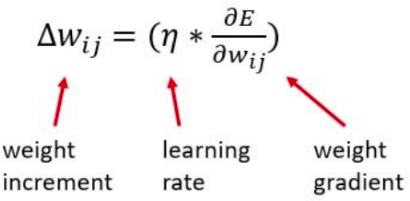

In [14]:
# perform a parameter update, with a given step size (aka the learning rate)
step_size = 0.05 ## Choose a value between 0 and 0.1 for the learning rate
W += -step_size * dW
b += -step_size * db
1e0

1.0

In [15]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some recommended hyperparameters
#step_size = 1e-0
#reg = 1e-3 # regularization strength
step_size = 0.1
reg = 1e-3

# gradient descent loop
num_examples = X.shape[0]
for i in range(1000):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.6110786113288122
iteration 10: loss 1.5931484380148138
iteration 20: loss 1.5764183227464674
iteration 30: loss 1.5608011401383144
iteration 40: loss 1.5462156042793707
iteration 50: loss 1.532586021480674
iteration 60: loss 1.5198420451188466
iteration 70: loss 1.507918421537455
iteration 80: loss 1.4967547246597792
iteration 90: loss 1.4862950814636402
iteration 100: loss 1.4764878924262532
iteration 110: loss 1.4672855515355656
iteration 120: loss 1.4586441701628183
iteration 130: loss 1.4505233084170304
iteration 140: loss 1.4428857168033016
iteration 150: loss 1.4356970902212782
iteration 160: loss 1.4289258356376946
iteration 170: loss 1.4225428541760345
iteration 180: loss 1.416521337891949
iteration 190: loss 1.4108365811371815
iteration 200: loss 1.4054658061437537
iteration 210: loss 1.4003880022684694
iteration 220: loss 1.3955837782101987
iteration 230: loss 1.3910352264352497
iteration 240: loss 1.3867257990075472
iteration 250: loss 1.3826401940106445


(-1.9977052250694038, 1.8622947749305996)

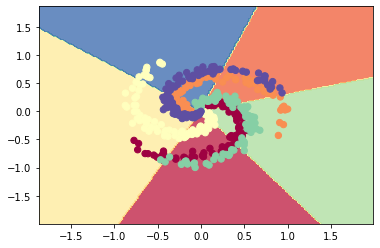

In [16]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [17]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f"training accuracy: {acc}")

training accuracy: 0.302


In [18]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [19]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [20]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [21]:
dhidden = np.dot(dscores, W2.T)


In [22]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

In [23]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [24]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print(f"iteration {i} loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0 loss 1.609619582722083
iteration 1000 loss 0.8072642886636114
iteration 2000 loss 0.768746275102049
iteration 3000 loss 0.7497351038358956
iteration 4000 loss 0.7444506769748436
iteration 5000 loss 0.739962279759106
iteration 6000 loss 0.7514801955209558
iteration 7000 loss 0.7390317756205871
iteration 8000 loss 0.736913183486611
iteration 9000 loss 0.7288062550834502


In [25]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f'training accuracy: {acc}') 

training accuracy: 0.718


(-1.9977052250694038, 1.8622947749305996)

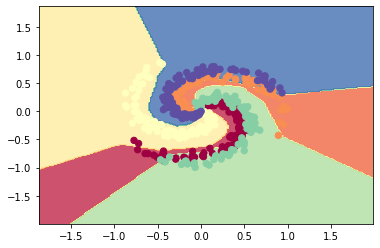

In [26]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
